**美国黄石公园老忠实喷泉的记录数据，分别记录其喷发的时长(eruptions)和停歇的时长(waiting)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [17]:
faithfulData = pd.read_csv("faithful.csv", index_col=0, dtype=np.float64)

In [18]:
faithfulData.head()

,eruptions,waiting
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85


In [28]:
waiting = faithfulData['waiting']
eruptions = faithfulData['eruptions']

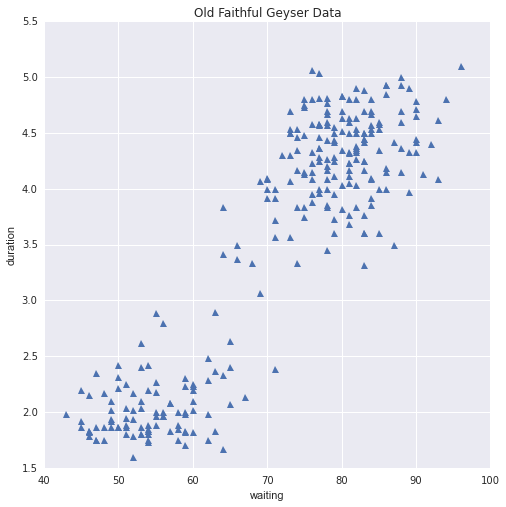

In [116]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
plt.plot(waiting.values, eruptions.values, '^')
plt.xlabel("waiting")
plt.ylabel("duration")
plt.title("Old Faithful Geyser Data")
plt.show()

In [6]:
import seaborn as sns

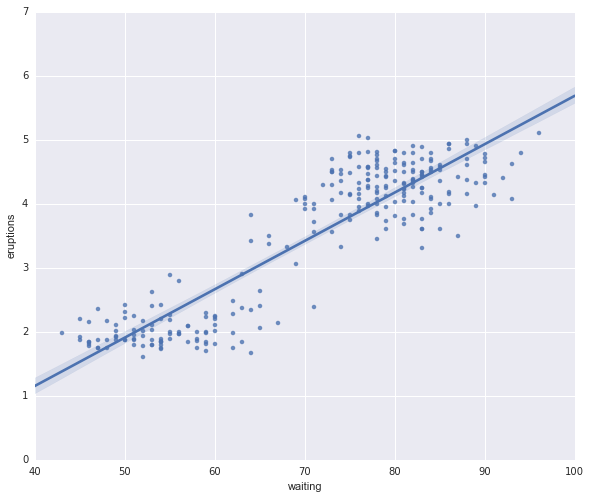

In [7]:
sns.pairplot(faithfulData, x_vars='waiting', y_vars='eruptions', size=7, aspect=1.2, kind='reg')

通过上面的可视化过程，我们可以认为其数据的分布是近似线性的，所以我们可以用简单的线性回归模型来去拟合数据。

In [58]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
trainx = waiting.values.reshape(272, 1)
trainy = eruptions.values
linreg.fit(trainx, trainy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
print "intercept b0 = %f" % linreg.intercept_
print "coefficiet b1 = %f" % linreg.coef_[0]

intercept b0 = -1.874016
coefficiet b1 = 0.075628


In [109]:
x = np.linspace(40, 100, 200)
x = x.reshape(200,1)
y = linreg.predict(x)

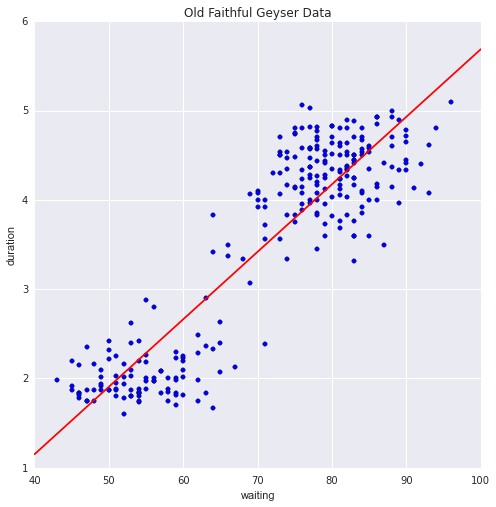

In [111]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
plt.scatter(waiting.values, eruptions.values)
plt.plot(x, y, 'r')
plt.xlim(40,100)
plt.ylim(1,6)
plt.xlabel("waiting")
plt.ylabel("duration")
plt.title("Old Faithful Geyser Data")
plt.show()

我们可以得到拟合的结果和参数：

$$\textbf{Y} = \beta_0+\beta_1\textbf{X}+\epsilon=-1.874016+0.075628\textbf{X}+\epsilon$$

In [64]:
residues = trainy-linreg.predict(trainx)

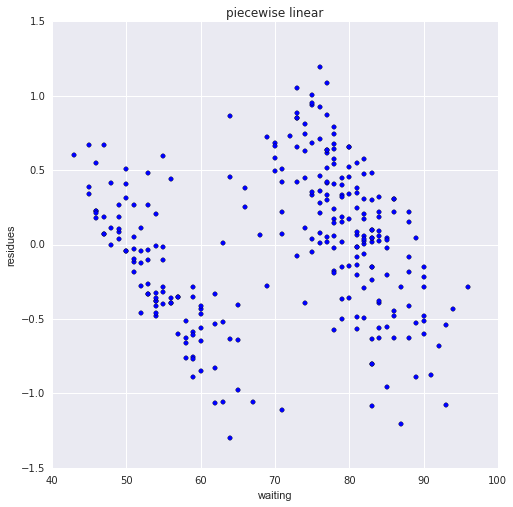

In [69]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
plt.scatter(waiting.values, residues)
plt.xlabel("waiting")
plt.ylabel("residues")
plt.title("piecewise linear")
plt.show()

上面对余量residues进行分析，发现可视化residues后，residues依然存在某种模式(pattern)，resudue不能很好的模拟随机的噪声，所以现在得到模型还不能很好地来描述数据，于是我们需要进一步来优化修正。

从residues图形我们可以看出其是分段线性的，在waiting=70这里点上将数据分成两部分，我们可以通过人为观察来构造几个非线性函数将原数据转化成新的特征，比如这里我们新加入两个特征，分别是$max(0, \textbf{$X_i$}-68)$和$max(0, \textbf{$X_i$}-72)$。

下面是加入非线性转换得到的线性模型的代码：

In [99]:
xi = waiting.values
feature2 = np.maximum(0, xi-68)
feature3 = np.maximum(0, xi-72)
train_data = {'f1': xi, 'f2': feature2, 'f3': feature3}
trainXFrame = pd.DataFrame(train_data)

In [100]:
linreg2 = LinearRegression()
linreg2.fit(trainXFrame.values, trainy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [105]:
x = np.linspace(40, 100, 200)
f2 = np.maximum(0, x-68)
f3 = np.maximum(0, x-72)
tdata = {'f1': x, 'f2': f2, 'f3': f3}
tX = pd.DataFrame(tdata)
y = linreg2.predict(tX.values)

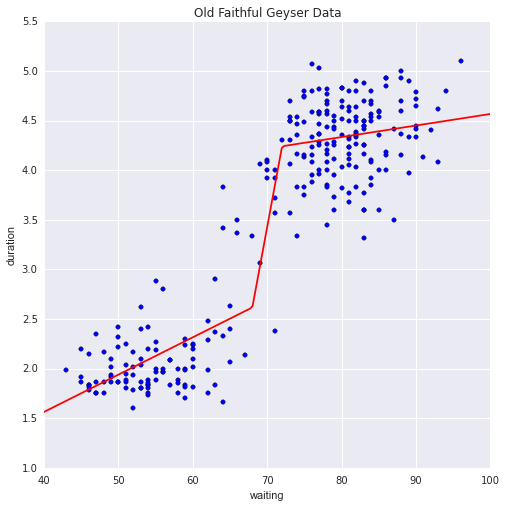

In [107]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
plt.scatter(waiting.values, eruptions.values)
plt.plot(x, y, 'r')
plt.xlim(40,100)
plt.xlabel("waiting")
plt.ylabel("duration")
plt.title("Old Faithful Geyser Data")
plt.show()

$$\textbf{$Y_i$} = \beta_0+\beta_1\textbf{$X_i$}+\beta_2max(0, \textbf{$X_i$}-68)+\beta_3max(0, \textbf{$X_i$}-72)+\epsilon_i$$

In [113]:
residues2 = trainy-linreg2.predict(trainXFrame.values)

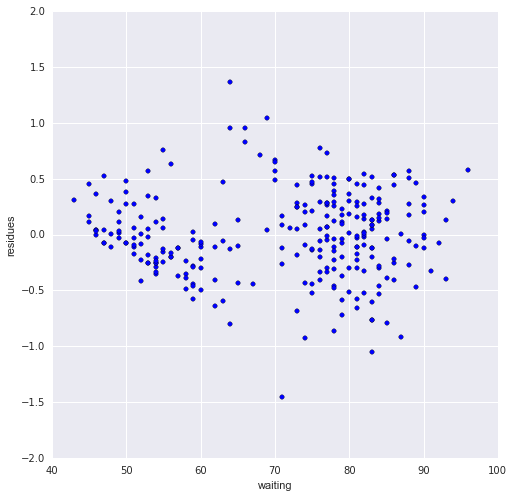

In [114]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
plt.scatter(waiting.values, residues2)
plt.xlabel("waiting")
plt.ylabel("residues")
plt.show()

这里得到的residues图形，我们发现其近似随机了，但在数据分散的方差还不是十分相等，说明还可以进一步来修正模型。